In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [97]:
smokers = np.load('smokers.npz')
data = smokers['data']

In [98]:
df = pd.DataFrame({'country': data[:, 0], 'smoking': data[:, 1], 'aod': data[:, 2]})
df

,country,smoking,aod
0,19,0,87
1,8,0,77
2,8,0,66
3,12,0,69
4,4,0,57
...,...,...,...
19995,9,0,68
19996,7,0,85
19997,14,0,54
19998,2,0,77


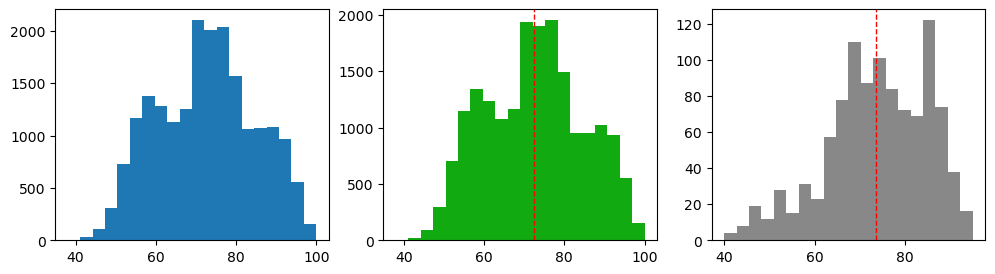

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
nbins = 20

avg_nsmok_aod = df[df['smoking'] == 0]['aod'].mean()
avg_smok_aod = df[df['smoking'] == 1]['aod'].mean()

_ = ax[0].hist(df['aod'], bins=nbins)

_ = ax[1].hist(df[df['smoking'] == 0]['aod'], bins=nbins, color='#11AA11')
_ = ax[1].axvline(x=avg_nsmok_aod, color='red', linestyle='--', linewidth=1)
# _ = ax[1].text(avg_nsmok_aod, plt.ylim()[0] - 180, f'{avg_nsmok_aod:.0f}', color='red', ha='center')

_ = ax[2].hist(df[df['smoking'] == 1]['aod'], bins=nbins, color='#888888')
_ = ax[2].axvline(x=avg_smok_aod, color='red', linestyle='--', linewidth=1)
# _ = ax[2].text(avg_smok_aod, plt.ylim()[0] - 11.5, f'{avg_smok_aod:.0f}', color='red', ha='center')


In [128]:
def unzip(zipped):
    L, R = [], []
    for l, r in zipped:
        L.append(l)
        R.append(r)
    return L, R

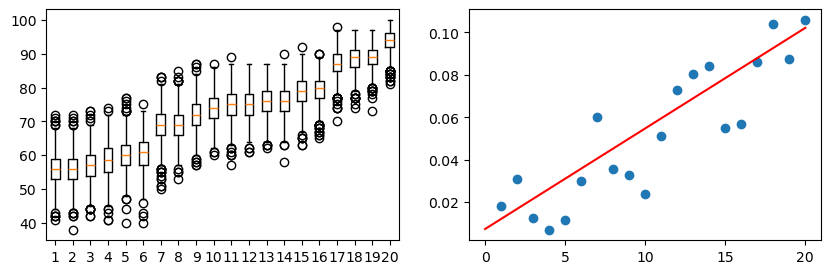

In [145]:
percent_smokers = []
for i, d in df.groupby('country'):
    total = len(d)
    percent_smokers.append(len(d[d['smoking'] == 1]) / total)

percent_smokers = np.array(percent_smokers)
data_all = [d['aod'] for i, d in df.groupby('country')]

data_all, percent_smokers = unzip(sorted(zip(data_all, percent_smokers), key=lambda x: x[0].mean()))

A = np.vstack([np.arange(20), np.ones(20)]).T
m, c = np.linalg.lstsq(A, percent_smokers, rcond=None)[0]
x = np.linspace(0, 20, 10)

fig, ax = plt.subplots(1, 2, figsize=(10,3))

_ = ax[0].boxplot(data_all)
_ = ax[1].scatter(1 + np.arange(20), percent_smokers)
_ = ax[1].plot(x, m*x + c, c='red')